In [5]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, Input, MaxPooling2D, BatchNormalization
from tensorflow.keras import Model
from time import time

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

# Set the seeds for reproducibility
from numpy.random import seed
from tensorflow.random import set_seed
seed_value = 1234578790
seed(seed_value)
set_seed(seed_value)

In [6]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Dataset params
num_classes = 10
size = x_train.shape[1]

print('Train set:   ', len(y_train), 'samples')
print('Test set:    ', len(y_test), 'samples')
print('Sample dims: ', x_train.shape)

4422102/4422102 [==============================] - 0s 0us/step
Train set:    60000 samples
Test set:     10000 samples
Sample dims:  (60000, 28, 28)


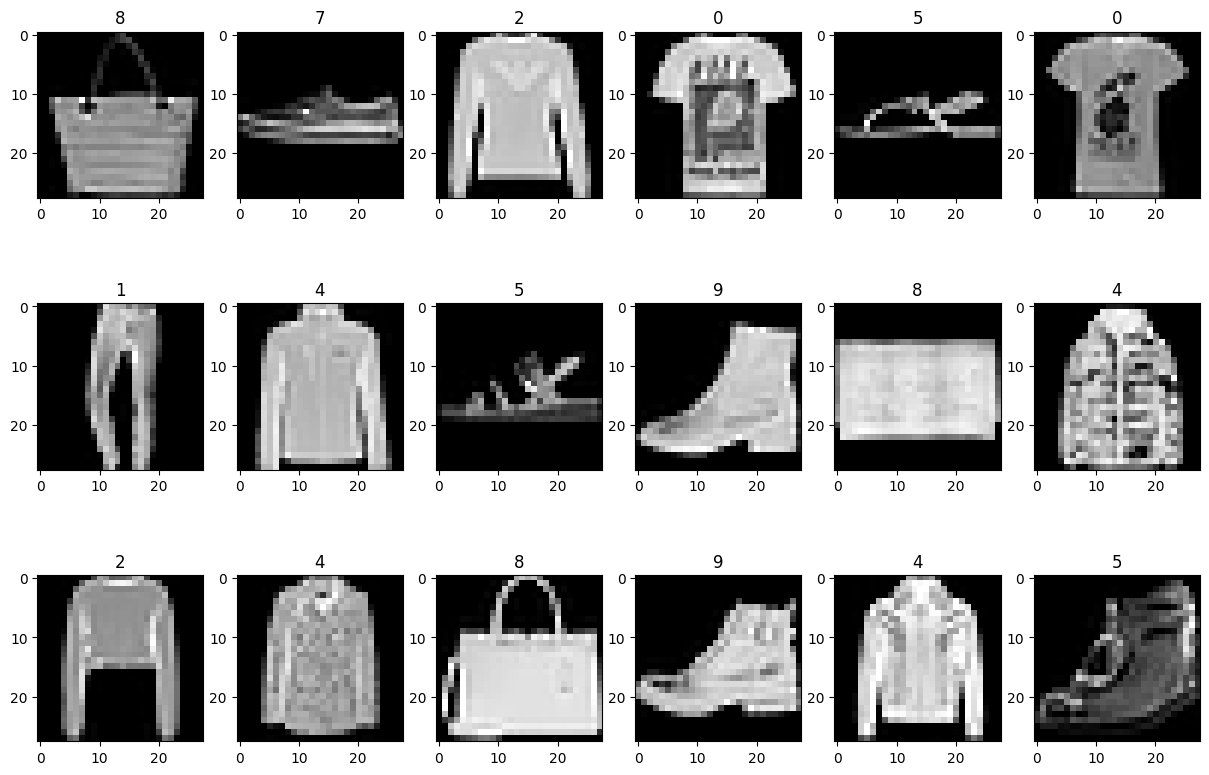

In [7]:
cnt = 1
for r in range(3):
    for c in range(6):
        idx = np.random.randint(len(x_train))
        plt.subplot(3,6,cnt)
        plt.imshow(x_train[idx, ...], cmap='gray')
        plt.title(y_train[idx])
        cnt = cnt + 1

In [8]:
# Data normalization
x_train = x_train/255
x_test = x_test/255

In [15]:
from tensorflow.keras.layers import Input, Dropout, BatchNormalization, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Model

# Define the model
inputs = Input(shape=(28, 28, 1))
net = Conv2D(64, kernel_size=(3, 3), activation="relu", padding='same')(inputs)
net = BatchNormalization()(net)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Conv2D(128, kernel_size=(3, 3), activation="relu", padding='same')(net)
net = BatchNormalization()(net)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Dropout(0.25)(net)
net = Flatten()(net)
net = Dense(256, activation="relu", kernel_regularizer=regularizers.l2(0.01))(net)
net = Dropout(0.5)(net)
outputs = Dense(10, activation="softmax")(net)

model = Model(inputs, outputs)
model.summary()





Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 batch_normalization_2 (Bat  (None, 28, 28, 64)        256       
 chNormalization)                                                
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 batch_normalization_3 (Bat  (None, 14, 14, 128)       512 

In [16]:
epochs = 70
batch_size = 128

# Compile the model
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/70
469/469 [==============================] - 230s 487ms/step - loss: 1.8904 - accuracy: 0.8091 - val_loss: 2.2382 - val_accuracy: 0.5494
Epoch 2/70
469/469 [==============================] - 219s 467ms/step - loss: 0.7711 - accuracy: 0.8667 - val_loss: 0.7545 - val_accuracy: 0.8776
Epoch 3/70
469/469 [==============================] - 217s 463ms/step - loss: 0.7166 - accuracy: 0.8784 - val_loss: 0.7065 - val_accuracy: 0.8831
Epoch 4/70
469/469 [==============================] - 213s 455ms/step - loss: 0.6827 - accuracy: 0.8872 - val_loss: 0.6303 - val_accuracy: 0.8863
Epoch 5/70
469/469 [==============================] - 218s 465ms/step - loss: 0.6164 - accuracy: 0.8946 - val_loss: 0.6194 - val_accuracy: 0.8841
Epoch 6/70
469/469 [==============================] - 213s 454ms/step - loss: 0.6018 - accuracy: 0.8964 - val_loss: 0.6378 - val_accuracy: 0.8776
Epoch 7/70
469/469 [==============================] - 217s 464ms/step - loss: 0.5905 - accuracy: 0.9003 - val_loss: 0.6340 -

Train Acc      0.9404666423797607
Validation Acc 0.9121000170707703


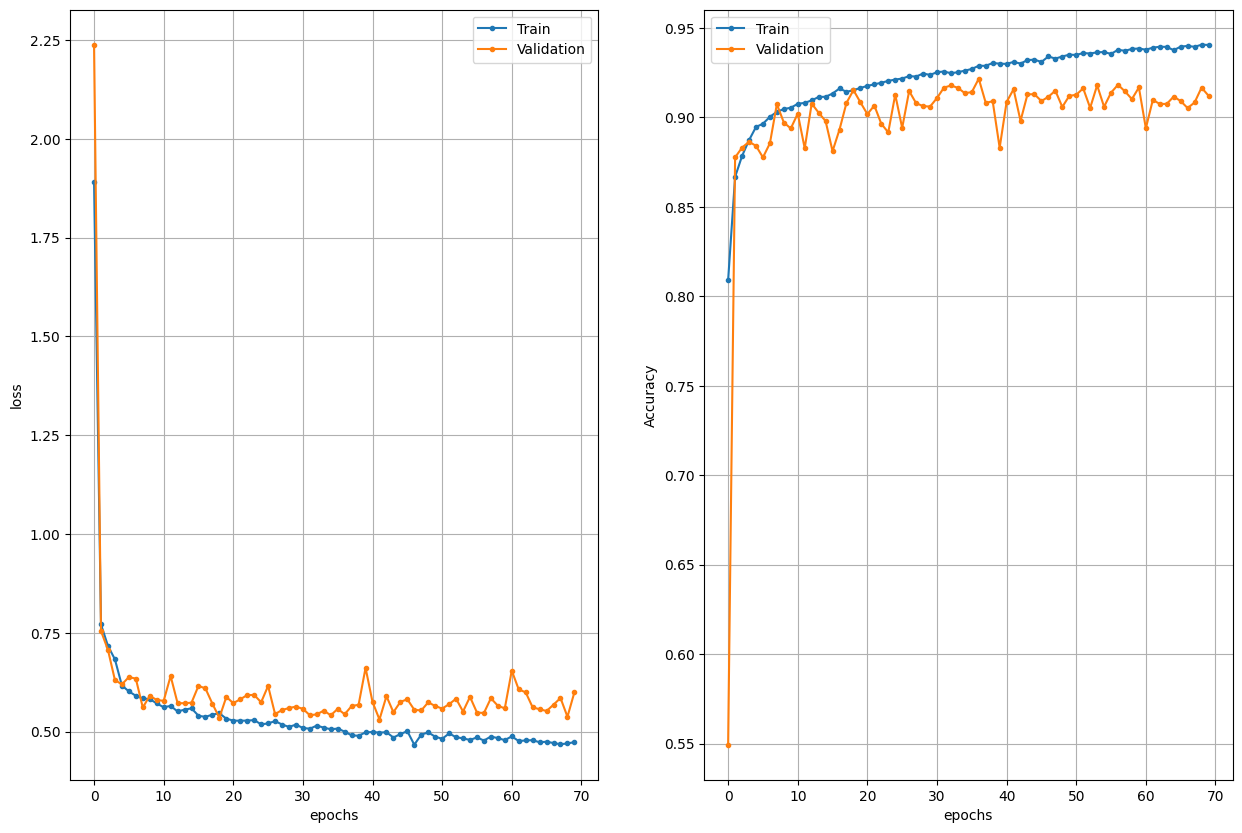

In [17]:
def plot_history(history):
    h = history.history
    epochs = range(len(h['loss']))

    plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
    plt.legend(['Train', 'Validation'])
    plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                               epochs, h['val_accuracy'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'])

    print('Train Acc     ', h['accuracy'][-1])
    print('Validation Acc', h['val_accuracy'][-1])

plot_history(history)